## Tree Based Methods

Trees can be used for both regression(quantitative predictor) and classification(qualitative predictor) problems.

In a tree the region are termed as terminal nodes or leaf whereas the points across which the splitting is done is known as internal node.

#### Regression Tree
The prediction of the regression tree is given by the mean value of the region where the given observation falls.

Tree Pruning -> We do tree pruning so that it doesn't overfit our training data set. It is done as a function of alpha which is a reminiscent of the Lasso equation.

The region for regression are divided such as that the RSS for the region is minimized for regression problem.

#### Classification Tree
For classificaton the prediction is done based on the most occuring class of the region where the given observation falls.

As RSS in the regression for classification we use Gini Index and Cross Entropy which determines the split and size of the tree.
These metrices gives the measure of the purity of terminal node.

Sometimes split is done to improve the node purity even though the two class predicts the same output.


Generally the Decision Trees doesn't do well when it comes to prediction accuracy when compared to other statistical algorithm. Therfore the below ensemble methods are used to improve the prediction accuracy of decisison trees.


#### Bagging(a.k.a Bootstrap)

In this method we build various trees by randomly selecting data from training data set and take an average of all the trees to come up with prediction on unseen data set(test data sets).

The variable importance is decided based on the mean RSS and mean Gini Index effect a variable has across all trees.

#### Random Forest

It overcomes the limitation of bagging discussed above by decorrelating the trees. It only consider a handful of predictors each time and fit a tree on it. By doing so our trees in random forest are not influenced by significant variable and looks different unlike the case in bagging.

#### Boosting

In this method the tree is fit on the residuals from the previous trees. Unlike the above two approach it can overfit for the large value of B(# of trees). There is also parameter which decides the number of predictors to be used to build intermediate trees and in general it is 1 because of the high accuracy. The trees with depth of 1 is called as 'Stump'.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
from google.colab import files
files.upload()

Saving Carseats.csv to Carseats.csv


{'Carseats.csv': b'\xef\xbb\xbfColumn1,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US\r\n1,9.5,138,73,11,276,120,Bad,42,17,Yes,Yes\r\n2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes\r\n3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes\r\n4,7.4,117,100,4,466,97,Medium,55,14,Yes,Yes\r\n5,4.15,141,64,3,340,128,Bad,38,13,Yes,No\r\n6,10.81,124,113,13,501,72,Bad,78,16,No,Yes\r\n7,6.63,115,105,0,45,108,Medium,71,15,Yes,No\r\n8,11.85,136,81,15,425,120,Good,67,10,Yes,Yes\r\n9,6.54,132,110,0,108,124,Medium,76,10,No,No\r\n10,4.69,132,113,0,131,124,Medium,76,17,No,Yes\r\n11,9.01,121,78,9,150,100,Bad,26,10,No,Yes\r\n12,11.96,117,94,4,503,94,Good,50,13,Yes,Yes\r\n13,3.98,122,35,2,393,136,Medium,62,18,Yes,No\r\n14,10.96,115,28,11,29,86,Good,53,18,Yes,Yes\r\n15,11.17,107,117,11,148,118,Good,52,18,Yes,Yes\r\n16,8.71,149,95,5,400,144,Medium,76,18,No,No\r\n17,7.58,118,32,0,284,110,Good,63,13,Yes,No\r\n18,12.29,147,74,13,251,131,Good,52,10,Yes,Yes\r\n19,13.91,110,110,0,408,68

In [0]:
Carseats = pd.read_csv('Carseats.csv', header='infer', index_col='Column1')

In [0]:
Carseats['High'] = np.where(Carseats['Sales'] <= 8, 0,1)

In [0]:
y = Carseats.High
x = Carseats.drop(['High'], axis=1)

In [0]:
x['Urban_new'] = np.where(x['Urban'] == 'Yes',1,0)
x.US_new = np.where(x['US'] == 'Yes',1,0)
x.loc[x.ShelveLoc == 'Bad', 'ShelveLoc_new'] = 0
x.loc[x.ShelveLoc == 'Medium', 'ShelveLoc_new'] = 1
x.loc[x.ShelveLoc == 'Good', 'ShelveLoc_new'] = 2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [0]:
from sklearn import tree

In [0]:
x = x.drop(['ShelveLoc','Urban','US'], axis=1)

In [0]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [0]:
import graphviz

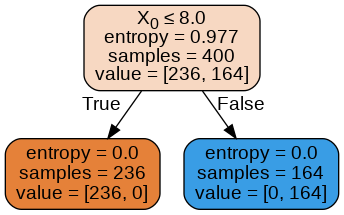

In [0]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, clf.predict(x))

array([[236,   0],
       [  0, 164]])